In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pro = pd.read_csv('insurance.csv')
pro

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
pro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
pro.shape

(1338, 7)

In [6]:
# value count for categorical value data 
print(pro.sex.value_counts(),'\n', pro.children.value_counts(),'\n', pro.region.value_counts(),'\n', pro.smoker.value_counts())

male      676
female    662
Name: sex, dtype: int64 
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64


In [7]:
## Replacing categorical value with numerical value 
pro['sex'] = pro['sex'].map({'male': 1, 'female': 0})
pro['smoker'] = pro['smoker'].map({'yes': 1, 'no': 0})
pro['region'] = pro['region'].map({'southeast': 0, 'southwest': 1, 'northwest': 2,'northeast': 3})

In [8]:
pro

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


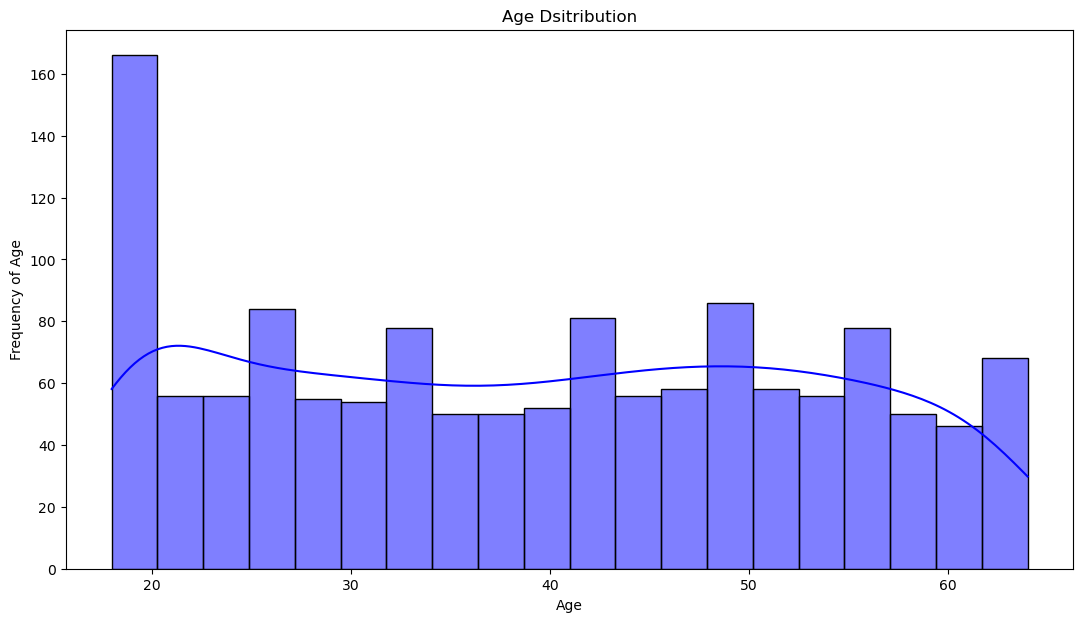

In [9]:
# univariate analysis (whenever we are trying to analyse single variable at a time)
# Checking age Distribution 
plt.figure(figsize=(13,7))
sns.histplot(pro.age,bins=20,kde=True,color = 'blue')
plt.title('Age Dsitribution')
plt.xlabel('Age')
plt.ylabel('Frequency of Age')
plt.show()

Maximum people in dataset have age below 20

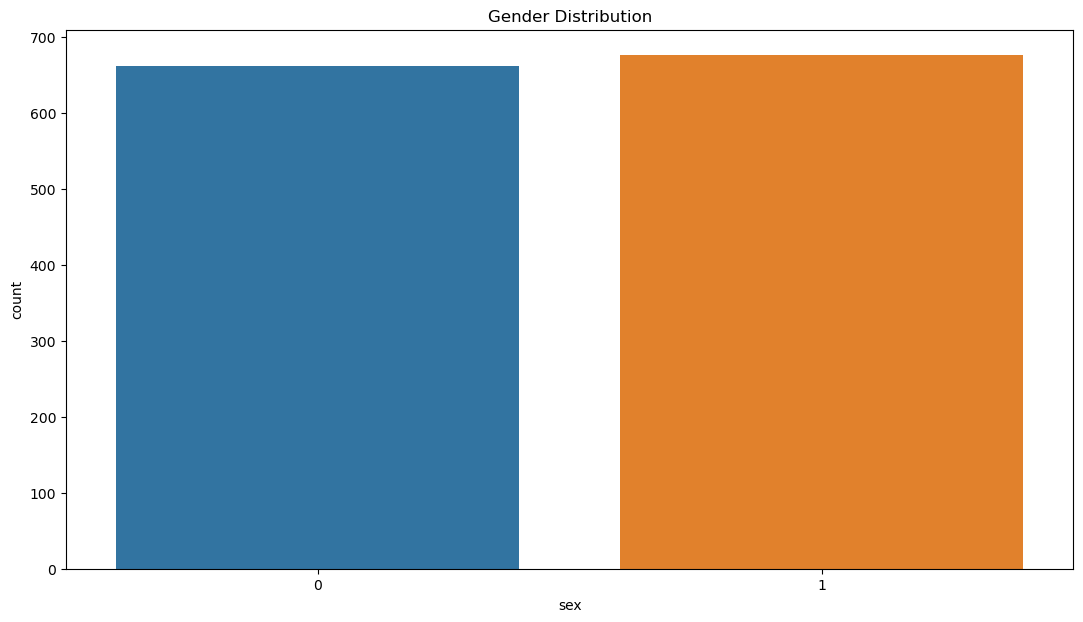

In [10]:
plt.figure(figsize=(13,7))
sns.countplot(x = 'sex',data=pro)
plt.title('Gender Distribution')
plt.show()

From this graph u can say males and females are  almost same in numbers

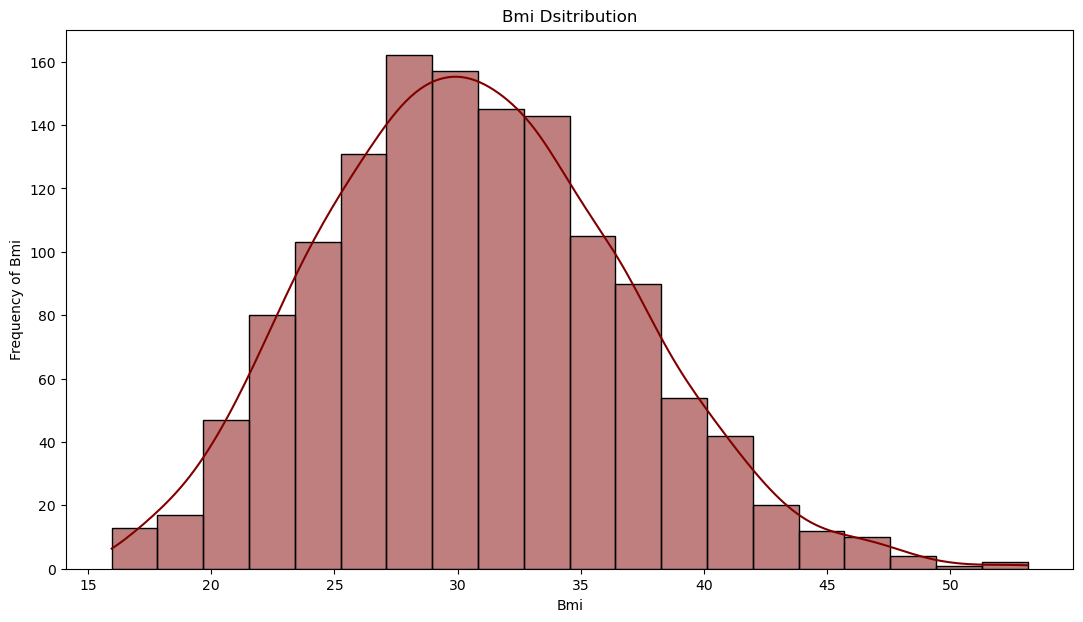

In [11]:

plt.figure(figsize=(13,7))
sns.histplot(pro.bmi,bins=20,kde=True,color = 'maroon')
plt.title('Bmi Dsitribution')
plt.xlabel('Bmi')
plt.ylabel('Frequency of Bmi')
plt.show()

The majority of people have bmi in between 25 and 40, which is considered as overweight and could be major factor in increasing the medical cost 

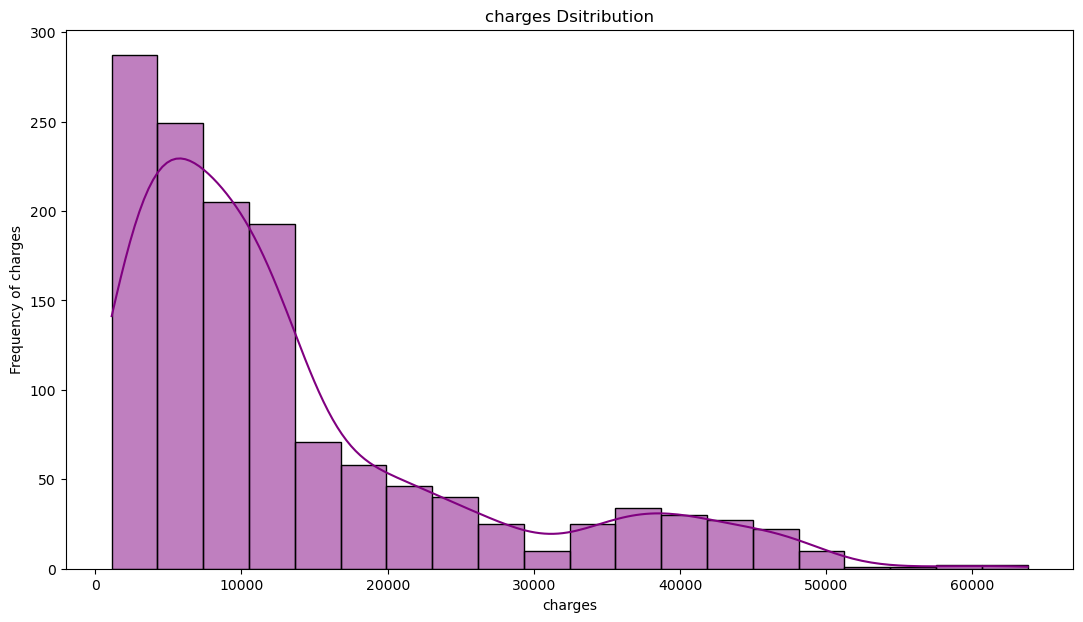

In [12]:
plt.figure(figsize=(13,7))
sns.histplot(pro.charges,bins=20,kde=True,color = 'purple')
plt.title('charges Dsitribution')
plt.xlabel('charges')
plt.ylabel('Frequency of charges')
plt.show()

maximum no of peoples have charges between 1000 to 12000 and some of majority have charges between 12000 to 20000 and small amount of  people have charges between 20000 to 50000 and negligilbe no of people have charges around 60000

<Axes: xlabel='charges', ylabel='smoker'>

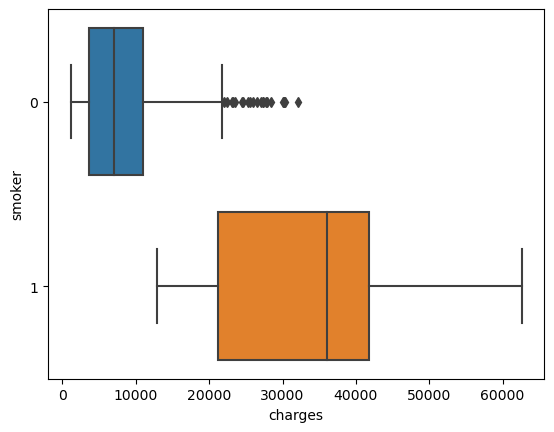

In [13]:
## Bivariate analysis
#for male 
sns.boxplot(y = 'smoker', x = 'charges', data = pro[(pro.sex==1)], orient = 'h')


<Axes: xlabel='charges', ylabel='smoker'>

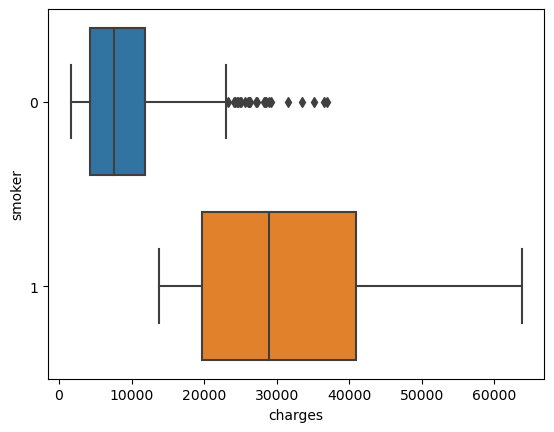

In [14]:
#for female
sns.boxplot(y = 'smoker', x = 'charges', data = pro[(pro.sex==0)], orient = 'h')


the assumption is true that the expense of males is greater than that of females in addition to that medical expenses of smokers is greater than that of non smokers

In [15]:
cor=pro.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


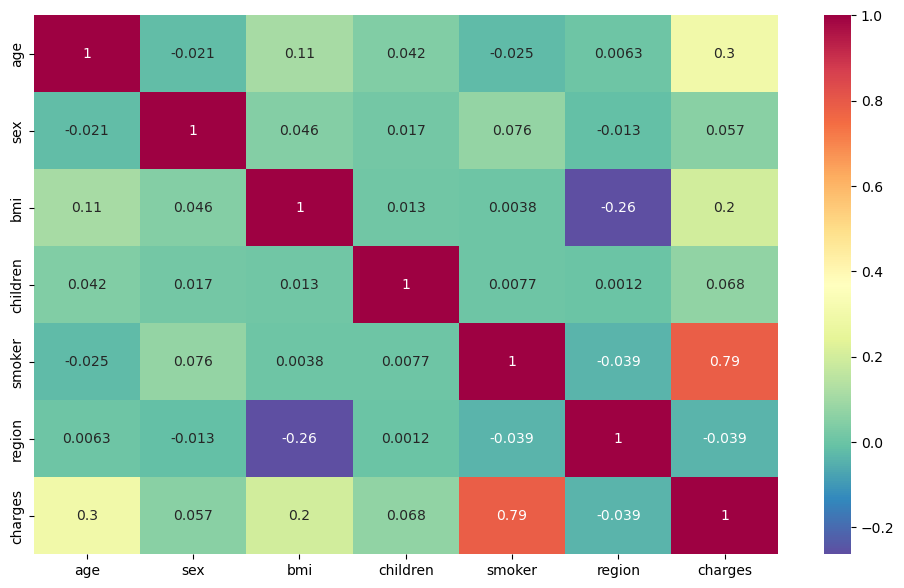

In [16]:
plt.figure(figsize= (12,7))
cor = pro.corr()
sns.heatmap(cor, annot = True, cmap = 'Spectral_r')
plt.show()

By above plot we can observe that smoker has more medical expenses so it has a high impact on insurance charge followed by age and bmi whereas region ,gender and children has no impact 

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1300x700 with 0 Axes>

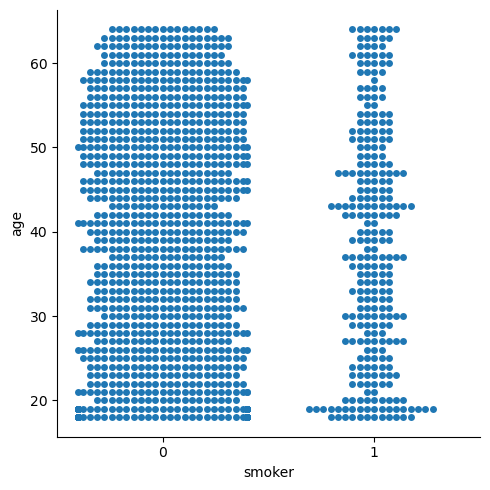

In [17]:
#relation between smoker nd age distribution
plt.figure(figsize=(13,7))
sns.catplot(x = 'smoker', y = 'age', kind = 'swarm',data = pro)

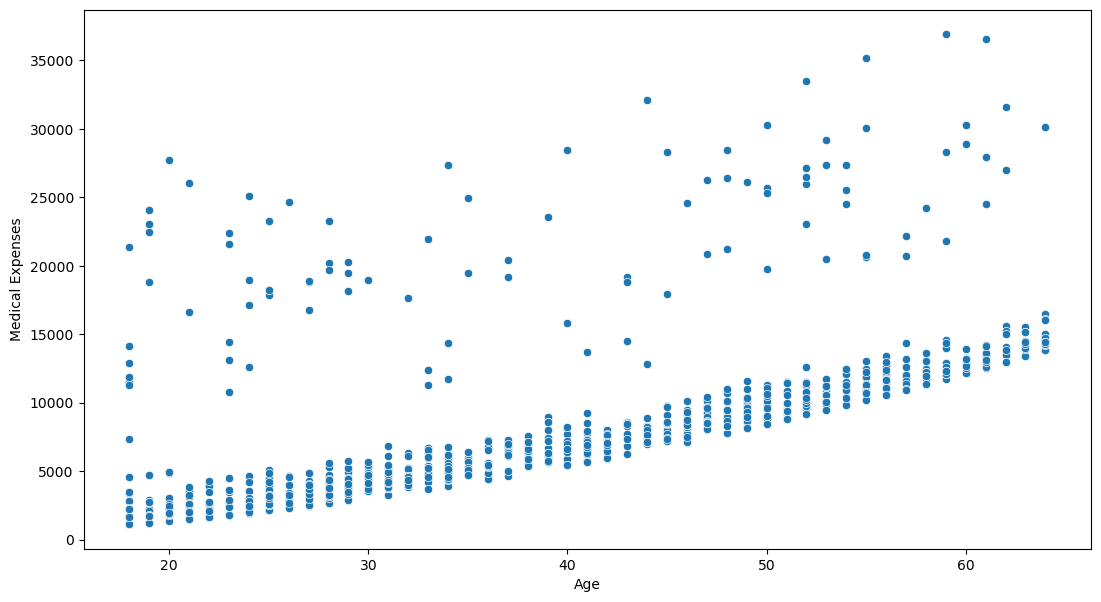

In [18]:
#Multi variate analysis
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'age',y = 'charges',data =pro[(pro.smoker == 0)])
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()

Majority of the points show that medical expenses increases with athe age which may due to the fact that older people are more prone to illness.
But there are some outliers which show other illness or expenses which may leads to increase in medical expenses

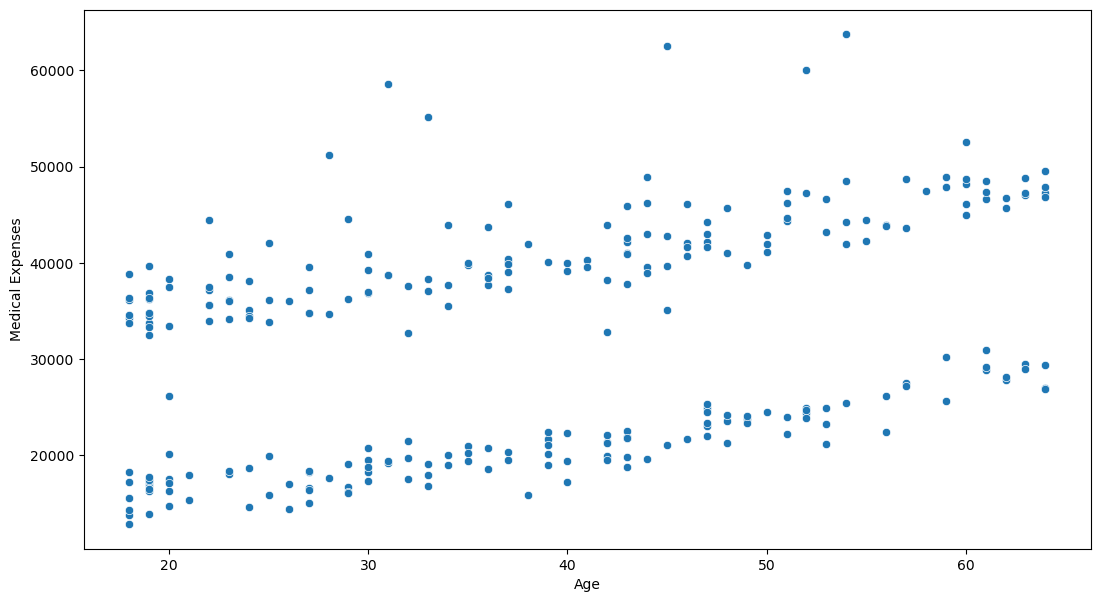

In [19]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'age',y = 'charges',data =pro[(pro.smoker == 1)])
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()

In this graph there are two segments ,one with high medical expenses which may due to the smoking related illness and other with low medical expense which may be due to age related illness

<Figure size 1300x700 with 0 Axes>

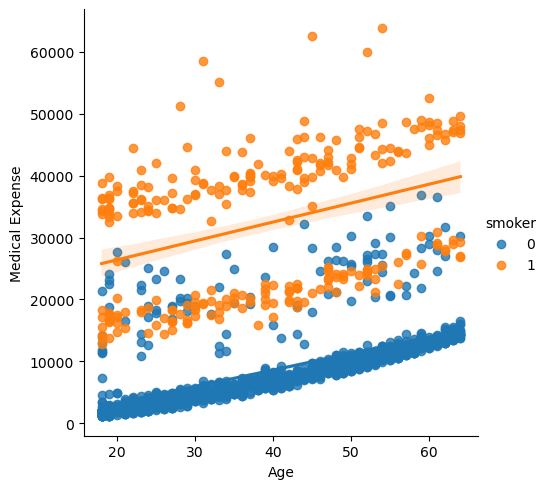

In [20]:
plt.figure(figsize=(13,7))
sns.lmplot(x='age',y='charges',data = pro, hue='smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Now,we can clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers irrespective of age. In non-smokers,the cost of treatment increses with age which is obvious.

C:\Users\acer\AppData\Local\Temp\ipykernel_6208\1998652089.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pro[(pro.bmi>30)]['charges'])


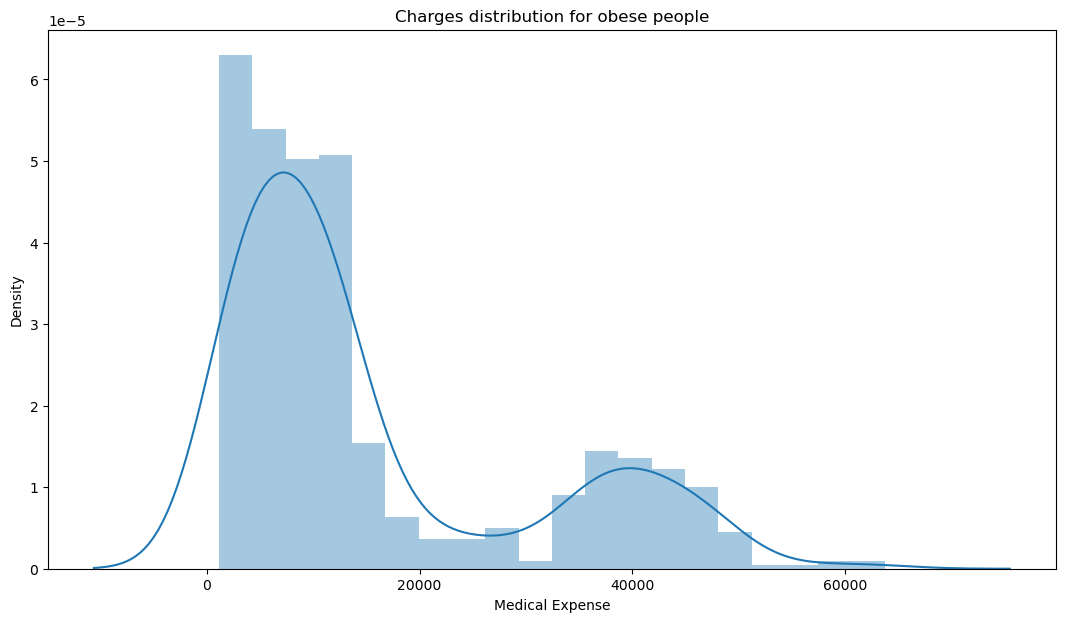

In [21]:
## Relation between BMI and Medical expenses (BMI>30)
plt.figure(figsize=(13,7))
sns.distplot(pro[(pro.bmi>30)]['charges'])
plt.title('Charges distribution for obese people')
plt.xlabel('Medical Expense')
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_6208\4143680227.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pro[(pro.bmi<30)]['charges'])


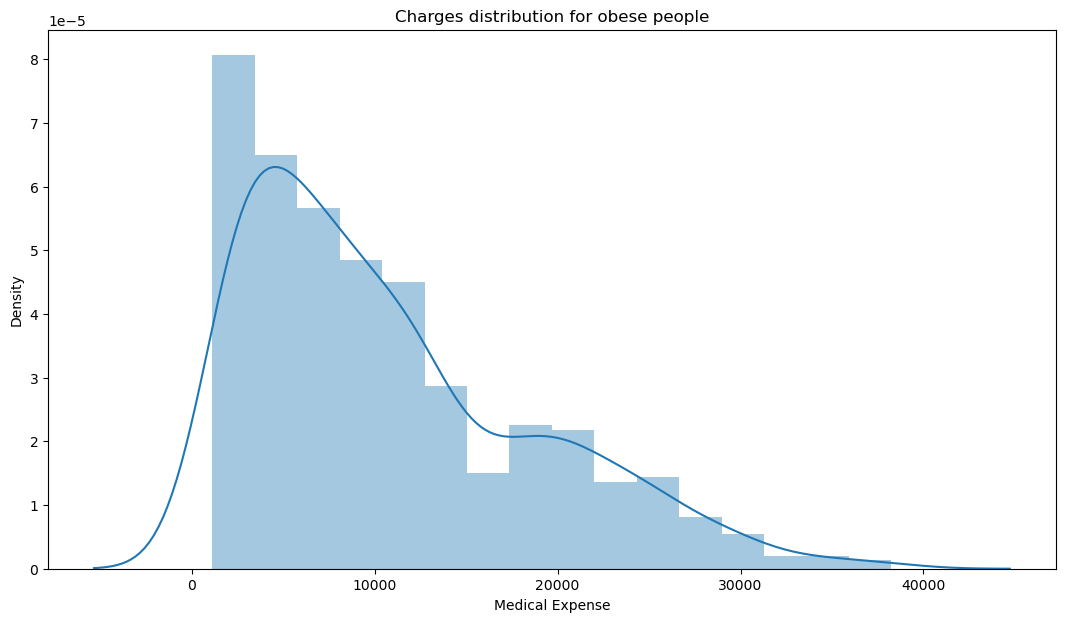

In [22]:
##BMI<30
plt.figure(figsize=(13,7))
sns.distplot(pro[(pro.bmi<30)]['charges'])
plt.title('Charges distribution for obese people')
plt.xlabel('Medical Expense')
plt.show()

Therefore,people with BMI less than 30 are spending less where as people with BMI more than 30 are spending more 

In [23]:
pro.pop('region')

0       1
1       0
2       0
3       2
4       2
       ..
1333    2
1334    3
1335    0
1336    1
1337    2
Name: region, Length: 1338, dtype: int64

In [24]:
pro

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


# Model Building and Evaluation

Linear Regression

In [25]:
x = pro.drop('charges', axis = 1)
y = pro.charges

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1003, 5), (335, 5), (1003,), (335,))

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
#Making Prediction
y_pred = reg.predict(x_test)
y_pred


array([ 1491.42220463, 11530.99708916,  9953.15126083,  2625.64872608,
        7886.61959339, 11389.85213928,  3289.1365212 ,   830.90363727,
       11996.61326917,  9444.622777  , 11424.51436652,  5344.11854478,
       30332.38835764,    47.66816326, 12346.49961139, 13511.96921128,
        3744.90598392,  7733.09952715, 29643.76515412,  2441.46643487,
       12239.96669177,  2605.07736647, 34418.15239408, 31612.08154637,
       30431.153038  ,  9121.4301058 ,  2051.1961879 , 15432.88409148,
        6780.77559211,  2025.83127279,  9839.84033579,  5646.82422816,
        4798.26066558,  4752.53289034, 10027.5485356 ,  5018.04703758,
       30062.3430807 ,  6870.04490193, 26970.97109402, 14211.76697817,
         258.55513052, 28314.43956471,  7707.63421809,  1805.59316008,
       10663.98993215,  8269.33746924, 11315.18836349,  8416.23328638,
       10960.85209797, 13735.37959521,  5790.44876092,  -507.087304  ,
       26036.96073084, 36551.98205163,  7639.36154535, 17894.25551069,
      

In [30]:
#Model Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

MAE: 4180.786422973237
RMSE: 6159.554567242218
R2 Score: 0.7486163979240839


# Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg

PolynomialFeatures()

In [32]:
# Transforming the feature to higher degree
x_train_poly = poly_reg.fit_transform(x_train)

#Splitting the data
x_train,x_test,y_train,y_test = train_test_split(x_train_poly,y_train,test_size=0.2,random_state = 42)

In [33]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(802, 21) (201, 21) (802,) (201,)


In [34]:
# train the model
plr = LinearRegression()
plr.fit(x_train,y_train)

LinearRegression()

In [35]:
#Making Prediction
y_pred_plr= plr.predict(x_test)

In [36]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_plr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_plr)))
print('R2 Score:',metrics.r2_score(y_test,y_pred_plr))


MAE: 2968.0675866169754
RMSE: 4852.834838876823
R2 Score: 0.7998931111191244


Resul:My model is able to explain 76% of the dataset

# Making a prediction System

In [37]:
age = 21
sex = 1
bmi = 27
children = 0
smoker = 1
charge = reg.predict([[age,sex,bmi,children,smoker]])
print('The charge of this new patient is $',charge[0])

The charge of this new patient is $ 25746.78028379008


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# OLS Model

In [38]:
import statsmodels.api as sm
x = sm.add_constant(x)
result  = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:21:07   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.205e+04    951.260    -12.670      0.000   -1.39e+04   -1.02e+04
age          257.7350     11.904     21.651      0.000     234.383     281.087
sex         -128.6399    333.361     -0.386      0.700    -782.609     525.329
bmi          322.3642     27.419     11.757      0.000     268.576     376.153
children     474.4111    137.856      3.441      0.001     203.973     744.849
smoker      2.382e+04    412.523     57.750      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.103   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.380
Skew:                           1.214   Prob(JB):                    3.73e-157
Kurtosis:                       5.650   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [40]:
#Ridge Regression
Ridgemodel = Ridge()
Ridgemodel

Ridge()

In [41]:
#training the model
Ridgemodel.fit(x_train,y_train)

Ridge()

In [45]:
#testing the model
r_pred = Ridgemodel.predict(x_test)
r2_score(y_test,r_pred) 

0.7995786933135305

In [47]:
import pickle 
pickle.dump(reg,open('Insurance.pkl','wb'))